<a href="https://colab.research.google.com/github/Arnisyahh/T3-Social-Media-Analysis/blob/main/Kpop_Analysis_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kpop_tweets.csv to kpop_tweets (2).csv
Jumlah data: 1200
20 kata paling sering: [('bts', 172), ('blackpink', 170), ('are', 161), ('the', 149), ('forever', 127), ('kings', 122), ('itzy', 86), ('charisma', 86), ('joke', 86), ('midzy', 86), ('loona', 70), ('legends', 70), ('orbit', 70), ('gfriend', 67), ('songs', 67), ('always', 67), ('touch', 67), ('heart', 67), ('love', 65), ('much', 65)]
Top 15 hashtags: [('#midzy', 86), ('#orbit', 70), ('#once', 64), ('#fearless', 64), ('#shawol', 62), ('#carat', 61), ('#reveluv', 60), ('#vip', 59), ('#neverland', 59), ('#kpop', 53), ('#engene', 52), ('#stay', 51), ('#army', 48)]


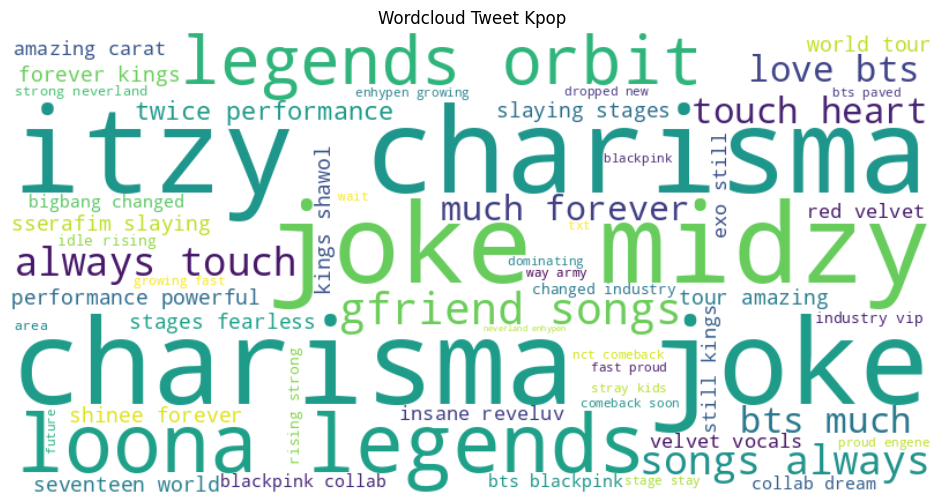


Distribusi sentimen:
sentiment_label
netral     786
positif    354
negatif     60
Name: count, dtype: int64


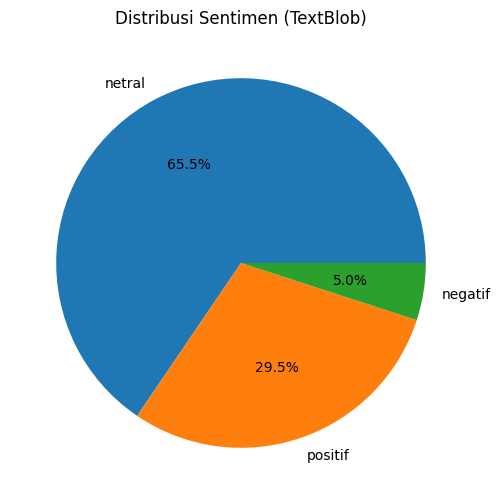


=== Contoh POSITIF ===
                                   text
     I love BTS so much! KPOP forever 💜
Enhypen growing so fast, proud! #ENGENE
     I love BTS so much! KPOP forever 💜

=== Contoh NETRAL ===
                           text
BTS x BLACKPINK collab dream? 😱
   TXT are the future of KPOP 💙
        BTS paved the way #Army

=== Contoh NEGATIF ===
                                   text
Red Velvet vocals are insane 🎶 #ReVeluv
Red Velvet vocals are insane 🎶 #ReVeluv
Red Velvet vocals are insane 🎶 #ReVeluv

KESIMPULAN: Mayoritas opini publik terhadap topik 'Kpop' cenderung netral.
Hasil sudah disimpan ke kpop_tweets_sentiment.csv


In [6]:
# Analisis Tweet Kpop - Sentiment Analysis

from google.colab import files
import pandas as pd

uploaded = files.upload()

# Baca CSV ke DataFrame
df = pd.read_csv("kpop_tweets.csv")
print("Jumlah data:", len(df))
df.head()

import re
from bs4 import BeautifulSoup

# Daftar singkatan umum (bisa ditambah sesuai kebutuhan)
abbreviations = {
    "u": "you",
    "r": "are",
    "btw": "by the way",
    "idk": "i don't know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "brb": "be right back"
}

def clean_text(text):
    text = str(text)
    text = BeautifulSoup(text, "html.parser").get_text()   # hapus HTML
    text = re.sub(r"http\S+|www\S+", "", text)             # hapus URL
    text = re.sub(r"@\w+", "", text)                       # hapus mention
    text = re.sub(r"#", " #", text)                        # biar hashtag jadi token
    text = text.lower().strip()

    # Ganti singkatan dengan bentuk panjang
    tokens = text.split()
    tokens = [abbreviations[t] if t in abbreviations else t for t in tokens]

    # Satukan lagi, tanda baca tidak dihapus
    text = " ".join(tokens)
    return text

# Tambahkan kolom cleaned di DataFrame
df["cleaned"] = df["text"].apply(clean_text)
df[["text","cleaned"]].head(10)

# Analisis kata & hashtag

all_text = " ".join(df["cleaned"].astype(str))
words = re.findall(r"\b\w+\b", all_text)

stopwords = ["https","rt","kpop","co","amp"]
words = [w for w in words if w not in stopwords and len(w) > 2]

word_freq = Counter(words).most_common(20)
print("20 kata paling sering:", word_freq)

hashtags = re.findall(r"#\w+", all_text)
hashtag_freq = Counter(hashtags).most_common(15)
print("Top 15 hashtags:", hashtag_freq)

# Wordcloud

!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Tweet Kpop")
plt.show()

# Sentiment Analysis (TextBlob)

!pip install textblob
from textblob import TextBlob

df["sentiment"] = df["cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_sentiment(x):
    if x > 0.1:
        return "positif"
    elif x < -0.1:
        return "negatif"
    else:
        return "netral"

df["sentiment_label"] = df["sentiment"].apply(label_sentiment)

print("\nDistribusi sentimen:")
print(df["sentiment_label"].value_counts())

# Visualisasi Sentimen

counts = df["sentiment_label"].value_counts()
plt.figure(figsize=(6,6))
counts.plot.pie(autopct="%1.1f%%", ylabel="", title="Distribusi Sentimen (TextBlob)")
plt.show()

# Contoh Tweet tiap kategori

for label in ["positif","netral","negatif"]:
    print(f"\n=== Contoh {label.upper()} ===")
    sample = df[df["sentiment_label"]==label].head(3)[["text"]]
    print(sample.to_string(index=False))

# Kesimpulan sederhana

mayoritas = df["sentiment_label"].value_counts().idxmax()
print(f"\nKESIMPULAN: Mayoritas opini publik terhadap topik 'Kpop' cenderung {mayoritas}.")

# === Simpan hasil ke CSV baru ===
output_file = "kpop_tweets_sentiment.csv"
df.to_csv(output_file, index=False, encoding="utf-8")
print(f"Hasil sudah disimpan ke {output_file}")

